# Deliverable 3

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint



#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Look at STATUS value counts for binning
application_df.STATUS.value_counts()
# droping column leaded to descreas in performance

1    34294
0        5
Name: STATUS, dtype: int64

In [3]:
# Look at SPECIAL_CONSIDERATIONS value counts for binning
application_df.SPECIAL_CONSIDERATIONS.value_counts()
# droping column leaded to descreas in performance

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], axis = 1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
# Look at APPLICATION_TYPE value counts for binning
app_types_counts = application_df["APPLICATION_TYPE"].value_counts()
# Determine which values to replace if counts are less than ...?
replace_app_types = list(app_types_counts[app_types_counts < 500].index)

# Replace in dataframe
for app in replace_app_types:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df["CLASSIFICATION"].value_counts()
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [7]:
# Look at INCOME_AMT value counts for binning
income_counts = application_df["INCOME_AMT"].value_counts()
income_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

<AxesSubplot:ylabel='Density'>

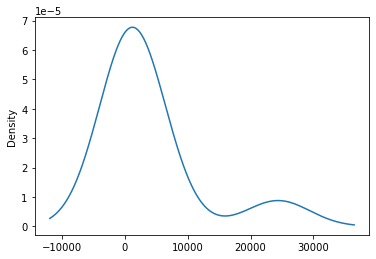

In [8]:
income_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ...?
replace_income = list(income_counts[income_counts < 500].index)

# Replace in dataframe
for app in replace_income:
    application_df.INCOME_AMT = application_df.INCOME_AMT.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
Other              564
10000-24999        543
Name: INCOME_AMT, dtype: int64

In [10]:
# Look at ASK_AMT value counts for binning
ask_amt_counts = application_df["ASK_AMT"].value_counts() 

<AxesSubplot:ylabel='Density'>

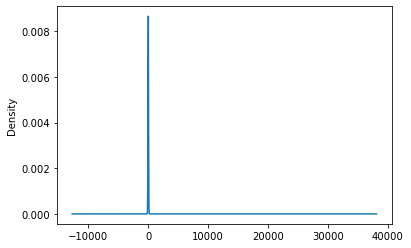

In [11]:
ask_amt_counts.plot.density()

In [12]:
# Determine which values to replace if counts are less than ...?
replace_ask_amt = list(ask_amt_counts[ask_amt_counts < 1000].index)

# Replace in dataframe
for amt in replace_ask_amt:
    if amt <= 49999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("5001-49999"))
    elif amt < 99999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("50000-99999"))
    elif amt < 499999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("100000-499999"))
    elif amt < 999999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("500000-999999"))
    elif amt < 4999999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("1M-5M"))
    else:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("5M+"))
    
application_df.ASK_AMT = application_df.ASK_AMT.astype(str)

# Check to make sure binning was successful
application_df.ASK_AMT.value_counts()

5000             25398
5001-49999        2947
100000-499999     2305
50000-99999       1421
1M-5M              940
500000-999999      651
5M+                637
Name: ASK_AMT, dtype: int64

In [13]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS',
 'ASK_AMT']

In [14]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_100000-499999,ASK_AMT_1M-5M,ASK_AMT_5000,ASK_AMT_50000-99999,ASK_AMT_500000-999999,ASK_AMT_5001-49999,ASK_AMT_5M+
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Merge one-hot encoded features and drop the originals
application_encoded_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_encoded_df = application_encoded_df.drop(columns = application_cat)
application_encoded_df.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_100000-499999,ASK_AMT_1M-5M,ASK_AMT_5000,ASK_AMT_50000-99999,ASK_AMT_500000-999999,ASK_AMT_5001-49999,ASK_AMT_5M+
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Split our preprocessed data into our features and target arrays
X = application_encoded_df.drop(["IS_SUCCESSFUL"],1).values
y = application_encoded_df["IS_SUCCESSFUL"].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Create a model

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 60
hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4800      
_________________________________________________________________
dense_1 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 12,721
Trainable params: 12,721
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints_opt/", exist_ok=True)
checkpoint_path = "checkpoints_opt/weights.{epoch:02d}hdf5"
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch', period=5)
epochs = 100

In [21]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=epochs, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5686 - accuracy: 0.7210
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5543 - accuracy: 0.7292
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5503 - accuracy: 0.7317
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5494 - accuracy: 0.7324
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5465 - accuracy: 0.7344

Epoch 00005: saving model to checkpoints_opt/weights.05hdf5
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5463 - accuracy: 0.7350
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5451 - accuracy: 0.7343
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5439 - accuracy: 0.7355: 0s - loss: 0.5414 
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5434 - accuracy: 0.7350
Epoch 10/1

804/804 [==============================] - 2s 2ms/step - loss: 0.5263 - accuracy: 0.7451
Epoch 73/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5254 - accuracy: 0.7455
Epoch 74/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5255 - accuracy: 0.7460
Epoch 75/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5254 - accuracy: 0.7456

Epoch 00075: saving model to checkpoints_opt/weights.75hdf5
Epoch 76/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5251 - accuracy: 0.7450
Epoch 77/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5252 - accuracy: 0.7451
Epoch 78/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5243 - accuracy: 0.7459
Epoch 79/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5251 - accuracy: 0.7447
Epoch 80/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5256 - accuracy: 0.7448

Epoch 00080: saving model to chec

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5708 - accuracy: 0.7279
Loss: 0.5708379745483398, Accuracy: 0.7279300093650818


In [23]:
# Save and export your results to an HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

### randomForest ml model

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.726
